# Clasificaciones de imagenes con EfficientNetB0

##BUILD ROBOCUP_2019 Dataset

RoboCup Dataset contains 196195 images.

8 main parent categories that contain 180 children categories.

80% for train

20% for Validate


##Importar los paquetes

In [2]:
from tensorflow import keras
import zipfile
import tensorflow as tf
import os
from google.colab import drive
import matplotlib.pyplot as plt

##EfficientNetB0 for subclass

###Load Data

In [18]:
#drive.mount('/content/drive')
ruta_archivo_zip = '/content/drive/MyDrive/Colab Notebooks/data_subclass.zip'
ruta_destino = './'
with zipfile.ZipFile(ruta_archivo_zip, 'r') as archivo_zip:
    # Extraer el archivo deseado en la ruta de destino
    archivo_zip.extractall(ruta_destino)

In [19]:
BATCH_SIZE = 64
IMG_SIZE = 224
NUM_CLASSES = 180

In [20]:
from keras.preprocessing.image import ImageDataGenerator

data_path = './training_data'
train_datagen = ImageDataGenerator(rescale=1.0 / 255,preprocessing_function=tf.keras.applications.efficientnet.preprocess_input, validation_split=0.2, horizontal_flip=True)
train_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False, seed=42, subset='training')
valid_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False,seed=42, subset='validation')

Found 157028 images belonging to 180 classes.
Found 39167 images belonging to 180 classes.


### Build model - EfficientNetB0

In [21]:
base_model = keras.applications.EfficientNetB0(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

#Then, freeze the base model.
base_model.trainable = False

#Create a new model on top.
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(180, activation='softmax')(x)

model = keras.Model(inputs, outputs)
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 180)               230580    
                                                                 
Total params: 4,280,151
Trainable params: 230,580
Non-trainable params: 4,049,571
_________________________________________________________________


### Evaluate model

In [22]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

model.compile(optimizer=keras.optimizers.Adam(1e-5),
                loss="categorical_crossentropy",
                metrics=[tf.keras.metrics.TopKCategoricalAccuracy(k=1, name='accuracy'), tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top_5_accuracy'),
                    tf.keras.metrics.Precision(name='precision')])
history = model.fit(train_batches, epochs=20, validation_data=valid_batches, callbacks=[callback])


Epoch 1/20
2454/2454 [==============================] - 437s 176ms/step - loss: 5.2527 - accuracy: 0.0042 - top_5_accuracy: 0.0245 - precision: 0.0000e+00 - val_loss: 5.2136 - val_accuracy: 0.0064 - val_top_5_accuracy: 0.0282 - val_precision: 0.0000e+00
Epoch 2/20
2454/2454 [==============================] - 435s 177ms/step - loss: 5.2175 - accuracy: 0.0056 - top_5_accuracy: 0.0242 - precision: 0.0000e+00 - val_loss: 5.1984 - val_accuracy: 0.0064 - val_top_5_accuracy: 0.0288 - val_precision: 0.0000e+00
Epoch 3/20
2454/2454 [==============================] - 435s 177ms/step - loss: 5.2067 - accuracy: 0.0060 - top_5_accuracy: 0.0214 - precision: 0.0000e+00 - val_loss: 5.1910 - val_accuracy: 0.0064 - val_top_5_accuracy: 0.0309 - val_precision: 0.0000e+00
Epoch 4/20
2454/2454 [==============================] - 416s 170ms/step - loss: 5.2014 - accuracy: 0.0041 - top_5_accuracy: 0.0242 - precision: 0.0000e+00 - val_loss: 5.1872 - val_accuracy: 0.0064 - val_top_5_accuracy: 0.0337 - val_precis

###print results

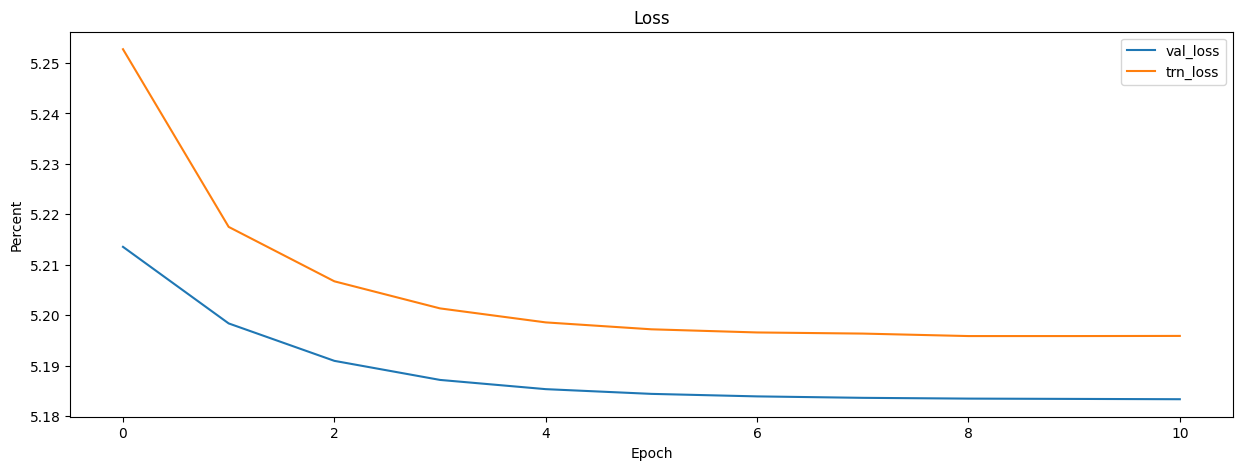

In [28]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_loss'],label='val_loss')
plt.plot(range(history.epoch[-1]+1),history.history['loss'],label='trn_loss')
plt.title('Loss'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

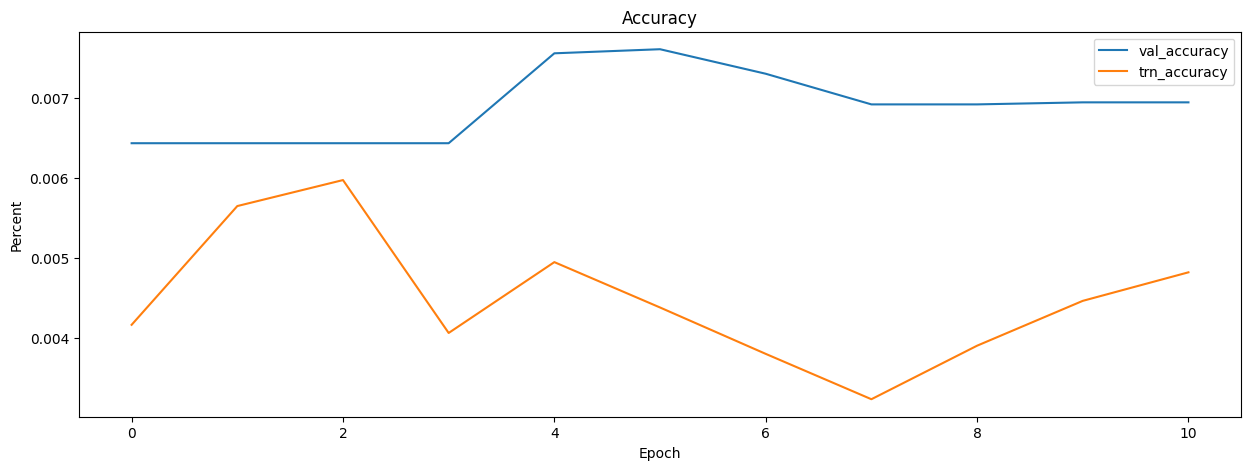

In [24]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_accuracy'],label='val_accuracy')
plt.plot(range(history.epoch[-1]+1),history.history['accuracy'],label='trn_accuracy')
plt.title('Accuracy'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

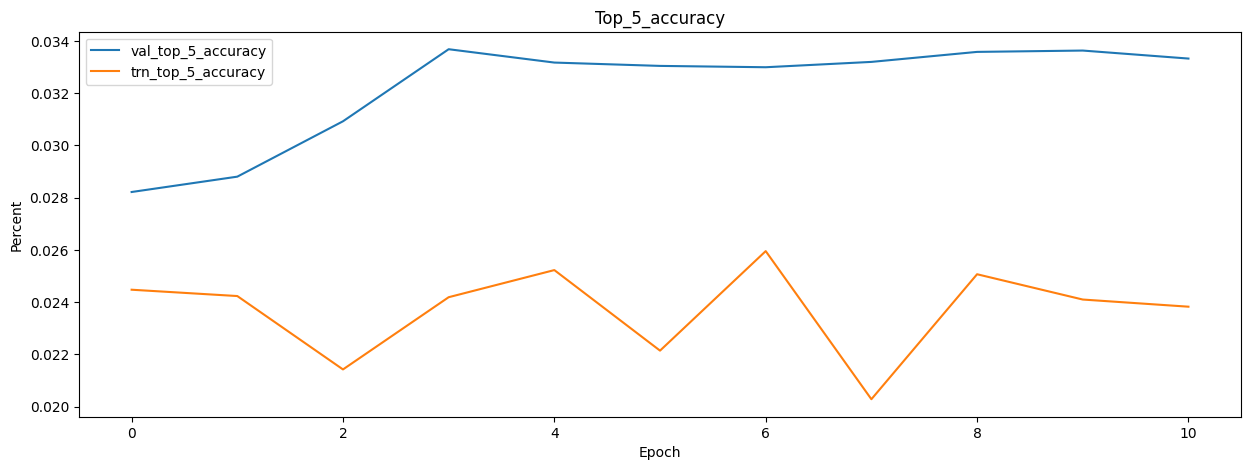

In [25]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_top_5_accuracy'],label='val_top_5_accuracy')
plt.plot(range(history.epoch[-1]+1),history.history['top_5_accuracy'],label='trn_top_5_accuracy')
plt.title('Top_5_accuracy'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

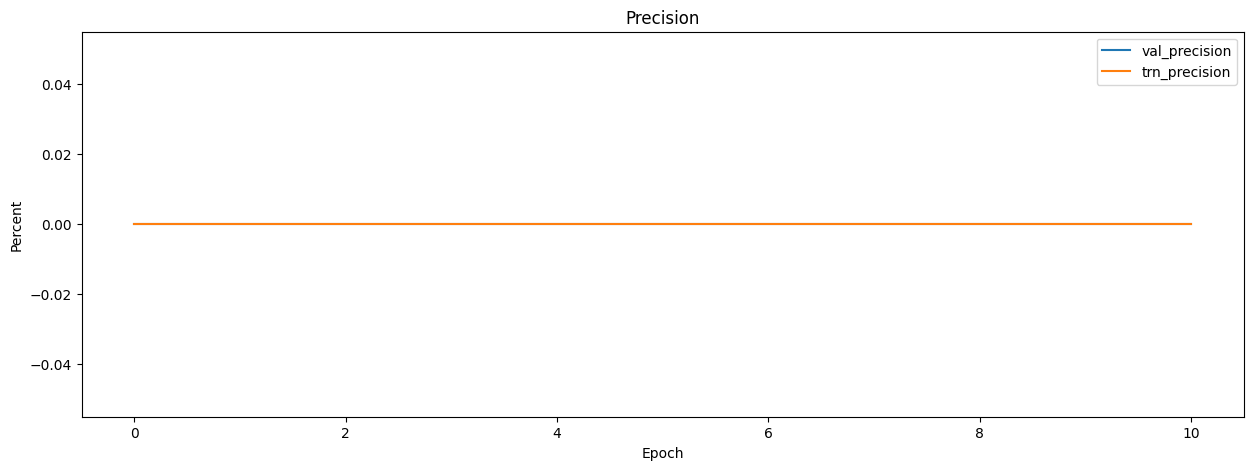

In [26]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_precision'],label='val_precision')
plt.plot(range(history.epoch[-1]+1),history.history['precision'],label='trn_precision')
plt.title('Precision'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

###Save Model

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/save_models/efficientNetB0')

## Resnet50V2 for Superclass

###Load super class data

In [3]:
drive.mount('/content/drive')
ruta_archivo_zip = '/content/drive/MyDrive/Colab Notebooks/data_superclass.zip'
ruta_destino = './'
with zipfile.ZipFile(ruta_archivo_zip, 'r') as archivo_zip:
    # Extraer el archivo deseado en la ruta de destino
    archivo_zip.extractall(ruta_destino)

Mounted at /content/drive


### Build model EfficientNetB0
 whose weights are generated in the previous step, when training with the fine classes.

In [4]:
BATCH_SIZE = 64
IMG_SIZE = 224
NUM_CLASSES = 8

In [5]:
from keras.preprocessing.image import ImageDataGenerator

data_path = './dataset_superclass'
train_datagen = ImageDataGenerator(rescale=1.0 / 255,preprocessing_function=tf.keras.applications.efficientnet.preprocess_input, validation_split=0.2, horizontal_flip=True)
train_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False, seed=42, subset='training')
valid_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False,seed=42, subset='validation')

Found 155474 images belonging to 8 classes.
Found 38865 images belonging to 8 classes.


In [6]:
base_model = keras.applications.EfficientNetB0(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

#Then, freeze the base model.
base_model.trainable = False

#Create a new model on top.
inputs = keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
# We make sure that the base_model is running in inference mode here,
# by passing `training=False`. This is important for fine-tuning, as you will
# learn in a few paragraphs.
x = base_model(inputs, training=False)
# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(8, activation='softmax')(x)

model = keras.Model(inputs, outputs)
model.summary()

16705208/16705208 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, 7, 7, 1280)       4049571   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 8)                 10248     
                                                                 
Total params: 4,059,819
Trainable params: 10,248
Non-trainable params: 4,049,571
_________________________________________________________________


### Evaluate model

In [7]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

model.compile(optimizer=keras.optimizers.Adam(1e-5),
                loss="categorical_crossentropy",
                metrics=[tf.keras.metrics.TopKCategoricalAccuracy(k=1, name='accuracy'), tf.keras.metrics.TopKCategoricalAccuracy(k=5, name='top_5_accuracy'),
                    tf.keras.metrics.Precision(name='precision')])
history = model.fit(train_batches, epochs=20, validation_data=valid_batches, callbacks=[callback])


Epoch 1/20
2430/2430 [==============================] - 454s 181ms/step - loss: 2.0536 - accuracy: 0.1800 - top_5_accuracy: 0.7159 - precision: 0.0000e+00 - val_loss: 2.0451 - val_accuracy: 0.2002 - val_top_5_accuracy: 0.7263 - val_precision: 0.0000e+00
Epoch 2/20
2430/2430 [==============================] - 440s 181ms/step - loss: 2.0460 - accuracy: 0.2002 - top_5_accuracy: 0.7263 - precision: 0.0000e+00 - val_loss: 2.0447 - val_accuracy: 0.2002 - val_top_5_accuracy: 0.7263 - val_precision: 0.0000e+00
Epoch 3/20
2430/2430 [==============================] - 438s 180ms/step - loss: 2.0460 - accuracy: 0.2002 - top_5_accuracy: 0.7263 - precision: 0.0000e+00 - val_loss: 2.0443 - val_accuracy: 0.2002 - val_top_5_accuracy: 0.7263 - val_precision: 0.0000e+00
Epoch 4/20
2430/2430 [==============================] - 437s 180ms/step - loss: 2.0457 - accuracy: 0.2002 - top_5_accuracy: 0.7263 - precision: 0.0000e+00 - val_loss: 2.0444 - val_accuracy: 0.2002 - val_top_5_accuracy: 0.7263 - val_precis

###print results

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_loss'],label='val_loss')
plt.plot(range(history.epoch[-1]+1),history.history['loss'],label='trn_loss')
plt.title('Loss'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_accuracy'],label='val_accuracy')
plt.plot(range(history.epoch[-1]+1),history.history['accuracy'],label='trn_accuracy')
plt.title('Accuracy'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_top_5_accuracy'],label='val_top_5_accuracy')
plt.plot(range(history.epoch[-1]+1),history.history['top_5_accuracy'],label='trn_top_5_accuracy')
plt.title('Top_5_accuracy'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

In [ ]:
# Construyamos horarios de entrenamiento
plt.figure(figsize=(15,5))
plt.plot(range(history.epoch[-1]+1),history.history['val_precision'],label='val_precision')
plt.plot(range(history.epoch[-1]+1),history.history['precision'],label='trn_precision')
plt.title('Precision'); plt.xlabel('Epoch'); plt.ylabel('Percent');plt.legend();
plt.show()

###save model

In [12]:
model.save('/content/drive/MyDrive/Colab Notebooks/save_models/efficientNetB0_superClass')

TypeError: ignored

##Confusion Matrix

###Importar los paquetes

In [15]:
from tensorflow import keras
from google.colab import drive
from sklearn.metrics import confusion_matrix
import zipfile
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

###Clases padres

In [6]:
ruta_archivo_zip = '/content/drive/MyDrive/Colab Notebooks/data_superclass.zip'
ruta_destino = './'
with zipfile.ZipFile(ruta_archivo_zip, 'r') as archivo_zip:
    # Extraer el archivo deseado en la ruta de destino
    archivo_zip.extractall(ruta_destino)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

data_path = './dataset_superclass'
train_datagen = ImageDataGenerator(rescale=1.0 / 255,preprocessing_function=tf.keras.applications.efficientnet.preprocess_input, validation_split=0.2, horizontal_flip=True)
train_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False, seed=42, subset='training')
valid_batches = train_datagen.flow_from_directory(
    data_path, target_size=(IMG_SIZE,IMG_SIZE), batch_size=BATCH_SIZE, shuffle = False,seed=42, subset='validation')

<ipython-input-16-e938478b7efd>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(valid_batches)


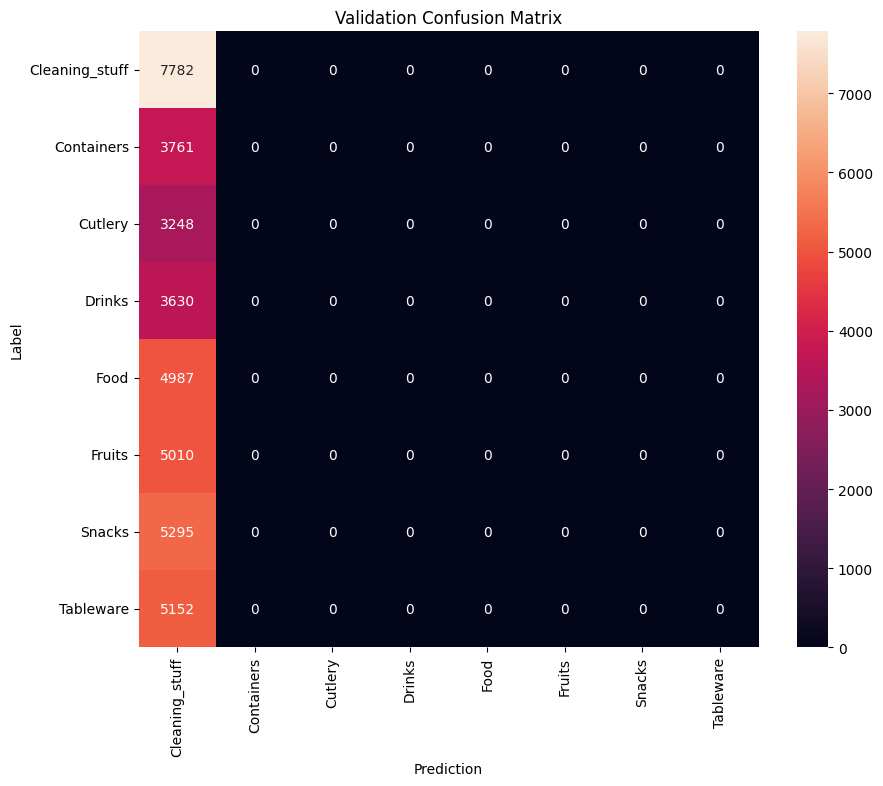

In [16]:
class_names = ['Cleaning_stuff', 'Containers', 'Cutlery', 'Drinks', 'Food', 'Fruits', 'Snacks', 'Tableware']

# Obtener las predicciones del modelo en el conjunto de validación
predictions = model.predict_generator(valid_batches)
predicted_classes = np.argmax(predictions, axis=1)

# Obtener las etiquetas reales del conjunto de validación
true_classes = valid_batches.classes

# Calcular la matriz de confusión
confusion_mtx = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(
    confusion_mtx, xticklabels=class_names, yticklabels=class_names, annot=True, fmt="g"
)
plt.xlabel("Prediction")
plt.ylabel("Label")
plt.title("Validation Confusion Matrix")
plt.show()

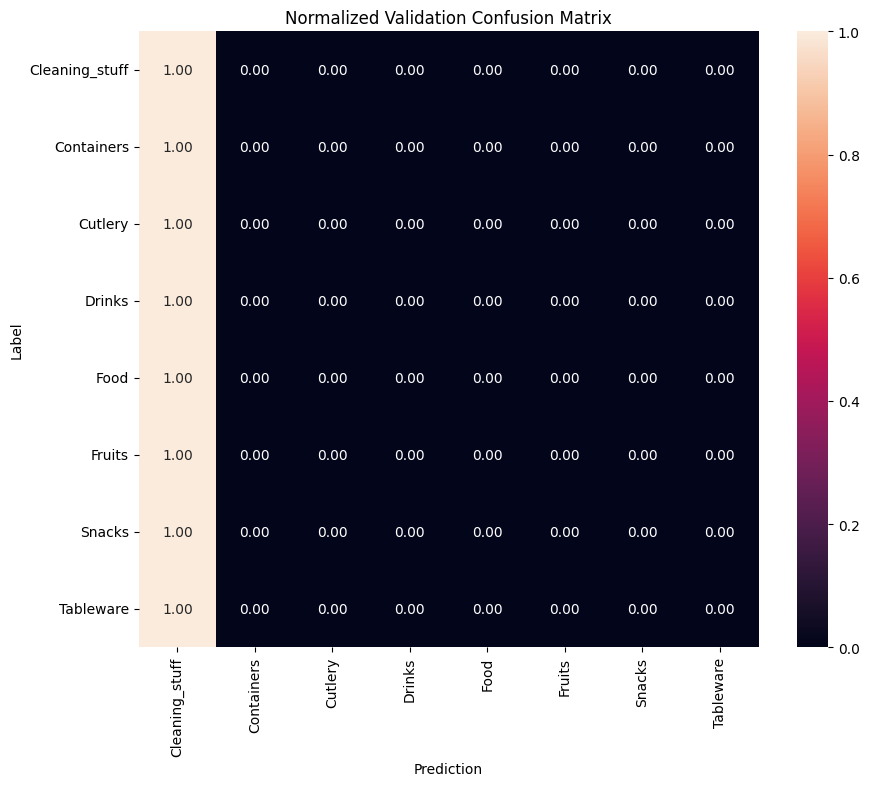

In [17]:
# Calcular el porcentaje de acierto para cada clase
class_totals = np.sum(confusion_mtx, axis=1)  # Total de instancias por clase
confusion_mtx_norm = confusion_mtx.astype('float') / class_totals[:, np.newaxis]  # Dividir cada elemento por el total de instancias en la clase correspondiente

# Plotear la matriz de confusión normalizada
plt.figure(figsize=(10, 8))
sns.heatmap(
    confusion_mtx_norm, xticklabels=class_names, yticklabels=class_names, annot=True, fmt=".2f"
)
plt.xlabel("Prediction")
plt.ylabel("Label")
plt.title("Normalized Validation Confusion Matrix")
plt.show()

###Clases hijos

In [30]:
# Obtener las predicciones del modelo en el conjunto de validación
predictions = model.predict_generator(valid_batches)
predicted_classes = np.argmax(predictions, axis=1)

# Obtener las etiquetas reales del conjunto de validación
true_classes = valid_batches.classes

# Calcular la matriz de confusión
confusion_mtx = confusion_matrix(true_classes, predicted_classes)

<ipython-input-30-04110bd1f13a>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(valid_batches)


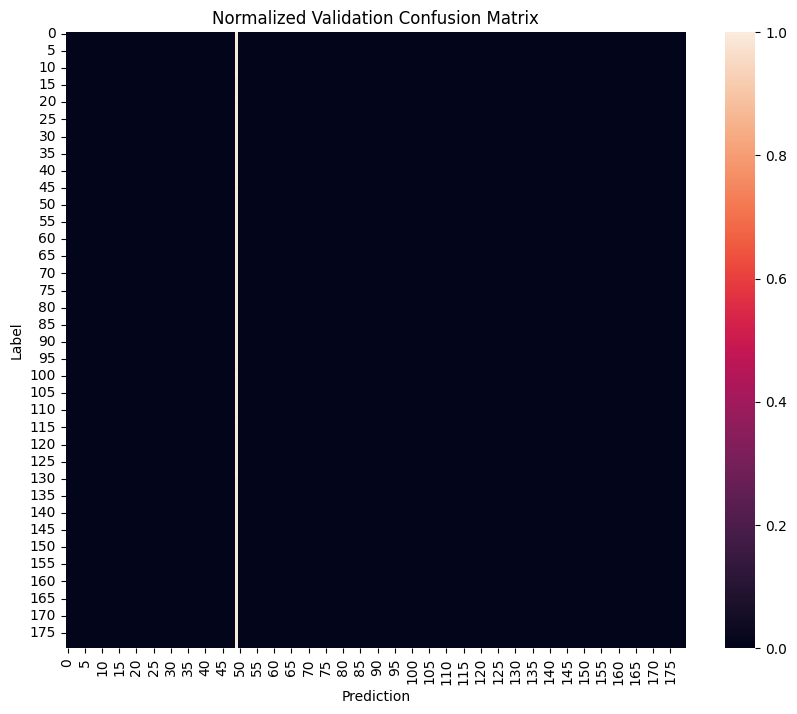

In [31]:
# Calcular el porcentaje de acierto para cada clase
class_totals = np.sum(confusion_mtx, axis=1)  # Total de instancias por clase
confusion_mtx_norm = confusion_mtx.astype('float') / class_totals[:, np.newaxis]  # Dividir cada elemento por el total de instancias en la clase correspondiente

# Plotear la matriz de confusión normalizada
plt.figure(figsize=(10, 8))
sns.heatmap(
    confusion_mtx_norm)
plt.xlabel("Prediction")
plt.ylabel("Label")
plt.title("Normalized Validation Confusion Matrix")
plt.show()